# Life Expectancy and GDP Starter
Project to analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First load and inspect data from all_data.csv:

In [2]:
df = pd.read_csv("all_data.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Identify unique values:

In [3]:
print("Unique Countries: ", df.Country.unique())
print("Unique Years: ", df.Year.unique())

Unique Countries:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Unique Years:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Life Expectancy over time
Start by reviewing how life expectancy has changed over the years from 2000 to 2015 for each nation:

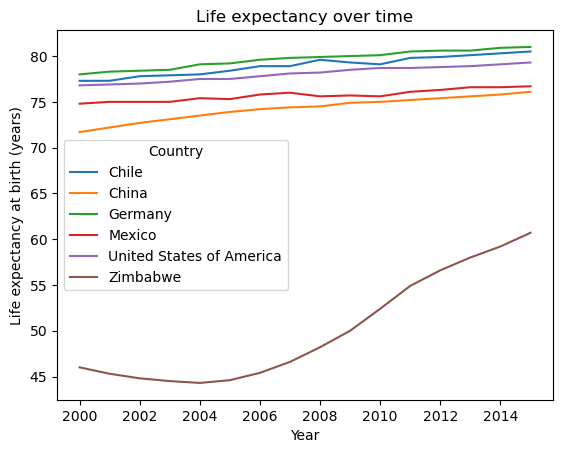

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure()
sns.lineplot(x=df["Year"], y=df["Life expectancy at birth (years)"], hue=df["Country"])
plt.title("Life expectancy over time")
plt.show()
plt.clf()

## GDP over time
Review how GDP has changed over the years from 2000 to 2015 for each nation:

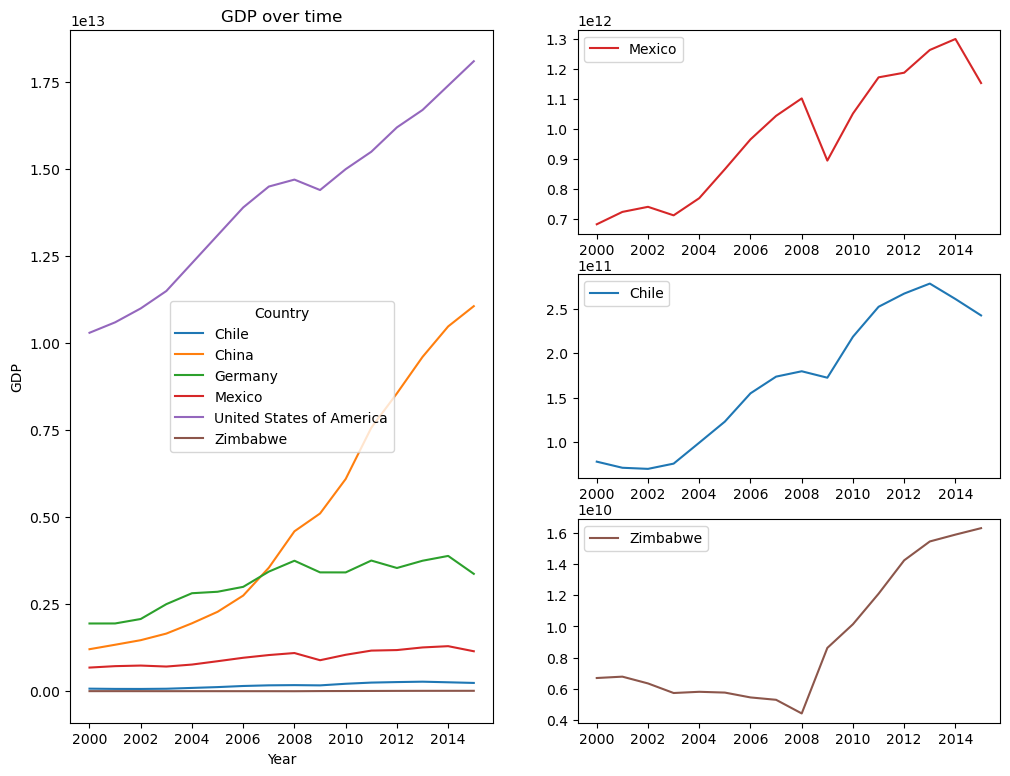

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(12,9))
plt.subplot(1,2,1)
sns.lineplot(x=df["Year"], y=df["GDP"], hue=df["Country"])
plt.title("GDP over time")
plt.subplot(3,2,2)
sns.lineplot(x=df.Year[df.Country == "Mexico"], y=df.GDP[df.Country == "Mexico"], color='#d62728', label='Mexico')
plt.ylabel('')
plt.xlabel('')
plt.subplot(3,2,4)
sns.lineplot(x=df.Year[df.Country == "Chile"], y=df.GDP[df.Country == "Chile"], color='#1f77b4', label='Chile')
plt.ylabel('')
plt.xlabel('')
plt.subplot(3,2,6)
sns.lineplot(x=df.Year[df.Country == "Zimbabwe"], y=df.GDP[df.Country == "Zimbabwe"], color='#8c564b', label='Zimbabwe')
plt.ylabel('')
plt.xlabel('')
plt.show()
plt.clf()

Significant differences in national GDP necessitated the additional focused graph for the three lowest-GDP nations.
From these graphs it can be identified that each nation's GDP trends upwards over time, with all nations experiencing a noticeable dip or reduction in growth around 2008-2009 (Coinciding with the global financial crisis at that time).

Notably, China and United States of America have experienced significant GDP growth compared to the other nations listed, while Germany's GDP has had it's growth since 2008 nullified by drops from 2008-2009, 2011-2012, and 2014-2015.

## Relationship between Life Expectancy and GDP
Having identified a positive trend in both Life Expectancy and GDP over time for each nation, it is worthwhile to assess for any correlation between the two.

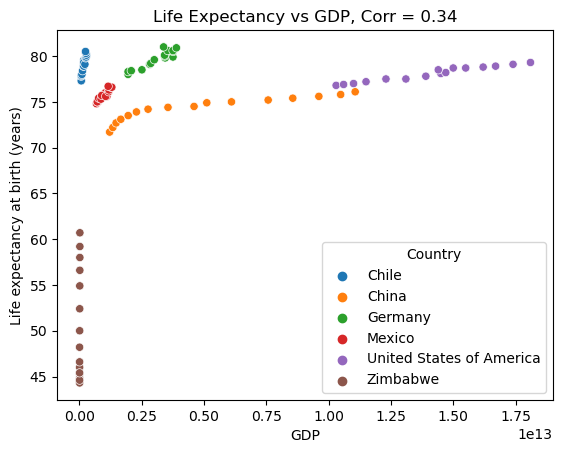

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure()
sns.scatterplot(x=df.GDP, y=df["Life expectancy at birth (years)"], hue=df.Country)
corr = round(df[["Life expectancy at birth (years)", "GDP"]].corr().iloc[0,1],2)
plt.title(f"Life Expectancy vs GDP, Corr = {corr}")
plt.show()
plt.clf()

An initial scatter plot with data from all nations indicates roughly linear groupings for each nation however the overall correlation is low yet positive at only 0.34, noting that this does indicate some correlation but the possibility of other factors having an impact.

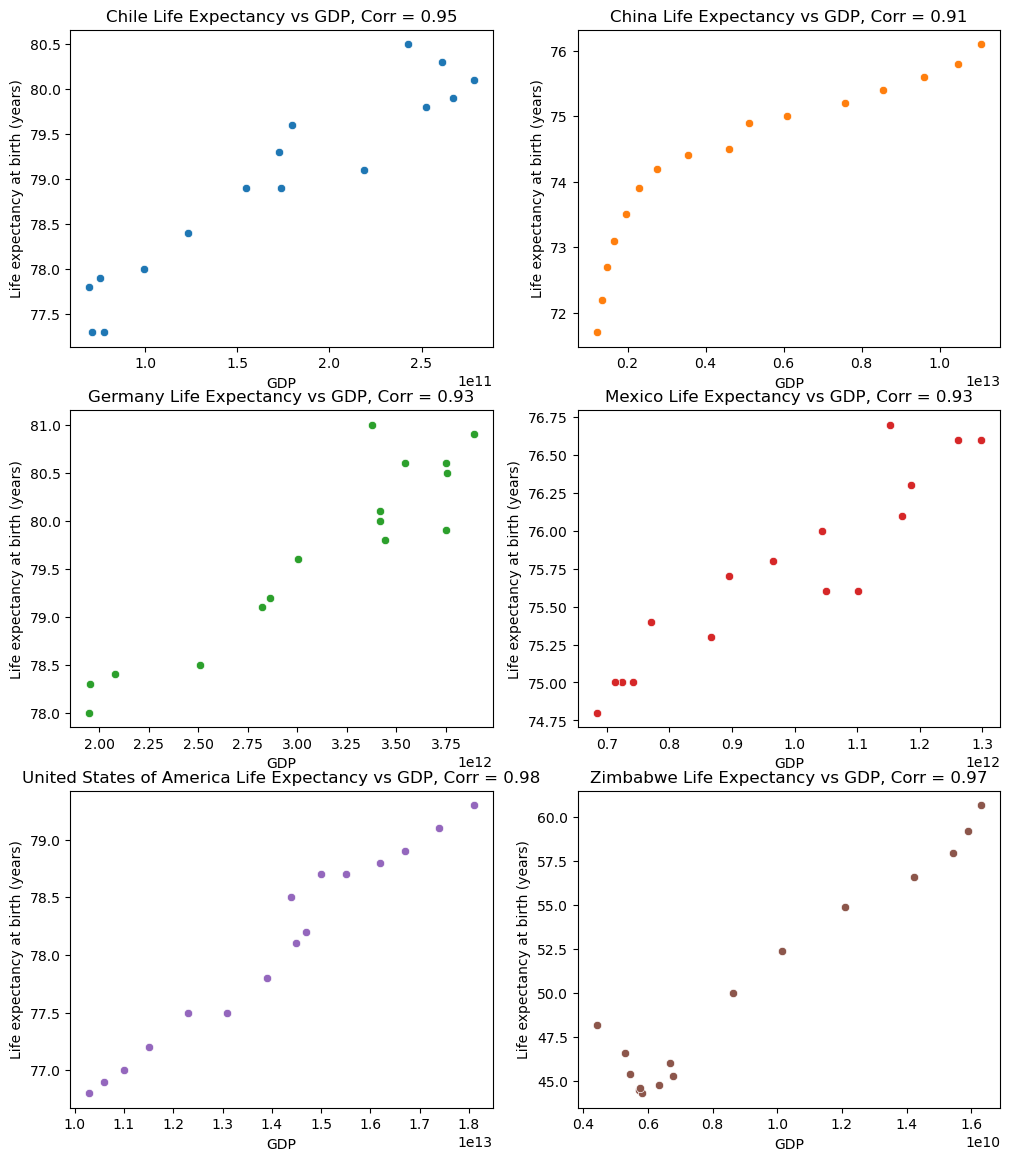

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(12,14))
for i in range(len(df.Country.unique())):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df.GDP[df.Country == df.Country.unique()[i]], y=df["Life expectancy at birth (years)"][df.Country == df.Country.unique()[i]], color=sns.color_palette()[i])
    corr = round(df[["Life expectancy at birth (years)", "GDP"]][df.Country == df.Country.unique()[i]].corr().iloc[0,1],2)
    plt.title(f"{df.Country.unique()[i]} Life Expectancy vs GDP, Corr = {corr}")
plt.show()
plt.clf()

Breaking the graphs down by each nation reveals very strong positive linear relationships (0.91 to 0.98) between Life Expectancy and GDP for all nations.

## Conclusion

In conclusion, this data indicates very strong positive correlation between a nation's Life Expectancy and its GDP, as well as a positive trend in both GDP and Life Expectancy for each nation over time.
However, the low correlation for the combined data indicates a high likelihood of other factors also having an impact on a nation's life expectancy. One possible suggestion is to gather population data as well, to assess impacts of details such as GDP per capita or national education levels.